# Lab 1

Welcome to the first CSE 185 lab! The goal of this lab is to get familiar with Colab and Python, explore computer vision applications, and learn some preliminary vision and image processing algorithms. Finally, you'll create your own panoramic image while implementing the RANSAC and DLT algorithms.

You will download and submit this colab notebook for your lab grade. There are some cells which require you to answer questions or complete and run code snippets.


#### 1. Colab tutorial

Google Colab (https://colab.research.google.com/) is an online platform for
editing, executing, and sharing Jupyter notebooks for Python hosted on Google drive. We will use Colab and Jupyter notebook for all the labs and assignments in this course.

Tutorial URL: https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj#scrollTo=oHTd7xQrt-BW
Google sign-in is required to run any Colab notebook. For assignments you complete in this course, click ”Copy to drive” so that you have a copy of the notebook in your Google Drive and changes will be saved as you work on the tutorial. Note that you do **not** need to submit the Colab tutorial or Python tutorial portions of Lab 1.

#### 2. Python tutorial

Python tutorial
https://colab.research.google.com/github/data-psl/lectures2020/blob/master/notebooks/01_python_basics.ipynb
This tutorial introduces basic python programming, NumPy, and Matplotlib. This tutorial is intended to be review for students of this course.

### 3. Computer vision applications

You can run demos of state-of-the-art computer vision algorithms through https://huggingface.co, which is an online community for open-sourced models.

##### 1. Image classification
Image classification is the task of assigning a label or class to an entire image. For simplicity in this demo, each image is expected to have only one class. Image classification models take an image as input and return a prediction about which class the image belongs to.
URL: https://huggingface.co/tasks/image-classification.
Upload images of your choice and check which class has the highest probability.

##### 2. Text-to-image
Text-to-image is the task of generating an image based on a text description (prompt). Recent advances in deep learning has enabled image generation that is highly realistic.
URL: https://huggingface.co/tasks/text-to-image.
Try the online demo and generate desired images based on input text prompts. Change prompts and see how the generated images are changed accordingly.

##### 3. Visual question answering
Visual Question Answering is the task of answering open-ended questions based on an image. VQA models output natural language responses to natural language questions.
URL: https://huggingface.co/tasks/visual-question-answering.
Upload images of your choice and ask questions about uploaded images, e.g., ”what’s in this image", "how many people are there in this image”, etc.

##### 4. Image to text
Image to text models output text from a given image. Image captioning or optical character recognition are considered some of the most common applications of image to text.
URL: https://huggingface.co/tasks/image-to-text.
Upload images of your choice and see what descriptions are generated.

##### 5. Object detection
Object detection models allow users to identify objects of certain defined classes. Object detection models receive an image as input and output the images with bounding boxes and labels on detected objects.
URL: https://huggingface.co/tasks/object-detection.
Upload images of your choice for the demo. Each bounding box is associated with a probability. Hover over each bounding box to see the output probability.

So, are all of the tasks of computer vision solved? No, not at all - new research tasks pop up all the time, and even the tasks we observed in this section are not completely solved! Based on images you selected in these demo systems, identify two shortcomings of any of the above models. If you selected "easy" images, you may need to try some additional images to stump the model. For each of the two shortcomings, display in this notebook the image you provided to the system, and explain what the model got wrong when evaluating the image.

Besides using the online demo webpages, we can also access these models programmatically through the HuggingFace API. This may be helpful in some of the last open-ended lab assignments.

First, we must install some pacakges using the code block below.

We provide these lines to install packages required to use the inference API.


# **The image I chose to use was of an Optimus Prime toy showing off his dance moves. Two of the shortcomings of the model came from trying to classify this image and trying to give this image a caption. When presented with the image, the program was not sure what to classify it as. There was some flip flop between classifying it as truck and classifying it as a toy, both of which are partly correct. When asking for a caption to the image, the program responded: "transformers transformers the movie opt opt opt opt opt opt opt opt opt opt opt opt opt". This is not a coherent sentence, although it did get the franchise that Optimus belongs to corrrectly. Overall, very funny responses to this image. **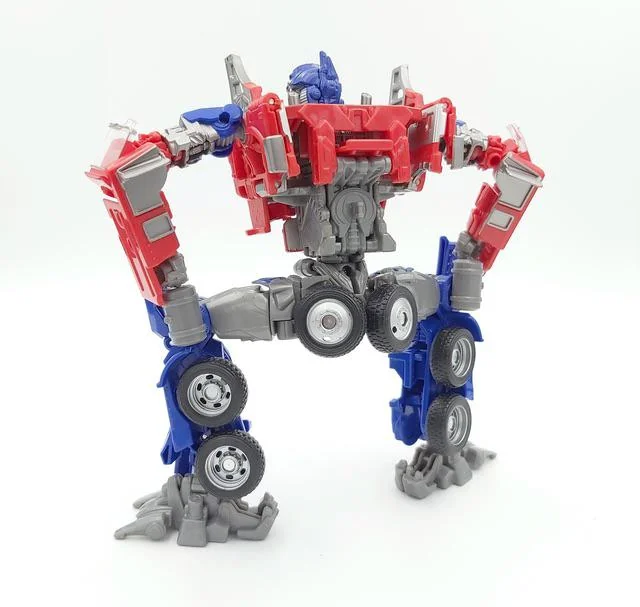

In [ ]:
! pip install transformers
! pip install diffusers
! pip install pillow

You can download an image of your choosing for working with these tools. Try out each task model, following the tutorials in the samples below.

1. Image classification

See code sample in the URL below. Use transformers.pipeline instead of huggingface.js. URL: https://huggingface.co/tasks/image-classification

2. Visual question answering

See code sample in the URL https://huggingface.co/tasks/visual-question-answering

3. Image to text

See code sample in the URL https://huggingface.co/tasks/image-to-text

4.  Object detection

See code sample in the URL https://huggingface.co/tasks/object-detection

5. Text to image

See code sample in the URL https://huggingface.co/tasks/text-to-image


In [10]:
from transformers import pipeline
from google.colab import files
from PIL import Image
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

#1 Image Classification
classification = pipeline("image-classification")
classification('optimus_thick.png')


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'half track', 'score': 0.26392391324043274},
 {'label': 'crane', 'score': 0.05585223436355591},
 {'label': 'tank, army tank, armored combat vehicle, armoured combat vehicle',
  'score': 0.05131238326430321},
 {'label': 'projectile, missile', 'score': 0.042073559015989304},
 {'label': 'cannon', 'score': 0.03536931052803993}]

In [5]:
#2 Visual question answering
vqa_pipeline = pipeline("visual-question-answering")

image =  Image.open("optimus_thick.png")
question = "Is there a toy?"

vqa_pipeline(image, question, top_k=1)

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'score': 0.9995798468589783, 'answer': 'yes'}]

In [6]:
#3 Image to Text
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
captioner("optimus_thick.png")

Device set to use cpu


[{'generated_text': 'transformers transformers the movie opt opt opt opt opt opt opt opt opt opt opt opt opt opt opt opt'}]

In [7]:
#4 Object Detection
model = pipeline("object-detection")
model("optimus_thick.png")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

[{'score': 0.9531540870666504,
  'label': 'truck',
  'box': {'xmin': 85, 'ymin': 52, 'xmax': 549, 'ymax': 547}}]

In [8]:
#5 Text to Image
model_id = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "Robot"
image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Now that we've seen some impressive and inspiring applications of computer vision, and equipped ourselves with the tools to use some of these models in our future projects out-of-the-box, it's time to go all the way back to the beginning, and start learning how these methods and tools came to be.

## Image basics ##

## 1. Getting and setting pixels ##

The most basic operation we want to do is change the pixels in an image. As we talked about in class, we represent an image as a 3 dimensional tensor. We have spatial information as well as multiple channels which combine together to form a color image. The convention is that the coordinate system starts at the top left of the image.

Your first task is to write two functions:

    def get_pixel(image, x, y, c)
    def set_pixel(image, x, y, c, v)

`get_pixel` should return the pixel value at column `x`, row `y`, and channel `c`. `set_pixel` should set channel `c` of the pixel `(x,y)` to the value `v`. You will need to do bounds checking to make sure the coordinates are valid for the image. `set_pixel` should simply return without doing anything if you pass in invalid coordinates.

We can test out our pixel-setting code on `pav.png`; try removing all of the red channel by setting red values to 0. Display the resulting image next to the original in your report.

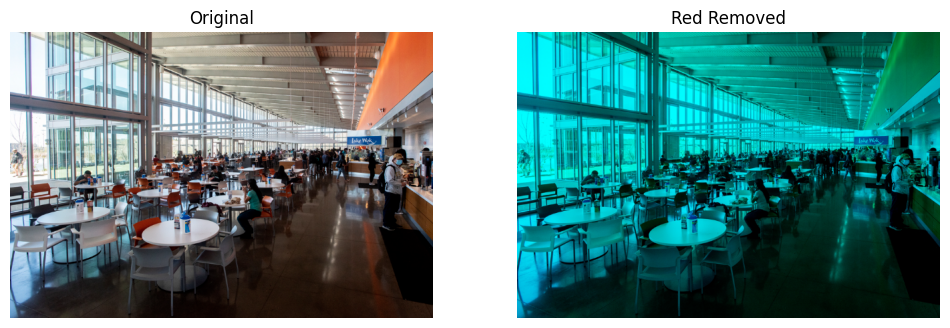

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_pixel(image, x,y,c):
  input_image = np.array(image)
  height, width, channels = input_image.shape
  if x < width and y < height and c < channels:
    return (image[y,x,c])

def set_pixel(image, x,y,c, v):
  input_image = np.array(image)
  height, width, channels = input_image.shape

  if x < width and y < height and c < channels:
    image[y,x,c] = v

# I decided to make this its own function just for organization's sake
def remove_red(image):
  height, width, channels = image.shape

  for y in range(height):
      for x in range(width):
          set_pixel(image, x, y, 0, 0)
  return image

# Here, opening the image and converting it to RGB instead of BGR
image = cv2.imread('pav.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(12,8))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(remove_red(image_rgb))
plt.title('Red Removed')
plt.axis('off')
plt.show()

### Chroma Keying - Turning UC Merced into UC Flavortown

Chroma keying is used for extracting the foreground from images, with the background typically being a green screen. In this problem, you have been provided 2 images: `guy.png` and `uc_flavortown.jpg`. Write a script to extract the foreground from `guy.png` and overlay the foreground on `uc_flavortown.jpg`. In your report you should include:

- A binary image showing the foreground mask, i.e., all foreground pixels set to 1 (or 255, or 255, 255, 255) and all background pixels set to 0. Your choice of 1 or 255 or a triplet of 255s will depend on how you choose to represent and render your binary image.
- An image with the background pixels set to 0 and the foreground pixels set to their original values.
- An image with the foreground overlayed on `uc_flavortown.jpg`. Note that depending on how you implement your algorithm, you may need to resize one of the images to match the dimensions of the other.

*Hint: we know how to get and set pixels now. Which pixels do we want to filter? Which channel might we be examining in our function? You may find it helpful to use a "color picker" tool from applications like MS Paint or Google Slides to identify the color of certain regions of the image to perform thresholding -- not all greens have the same value(s)!*


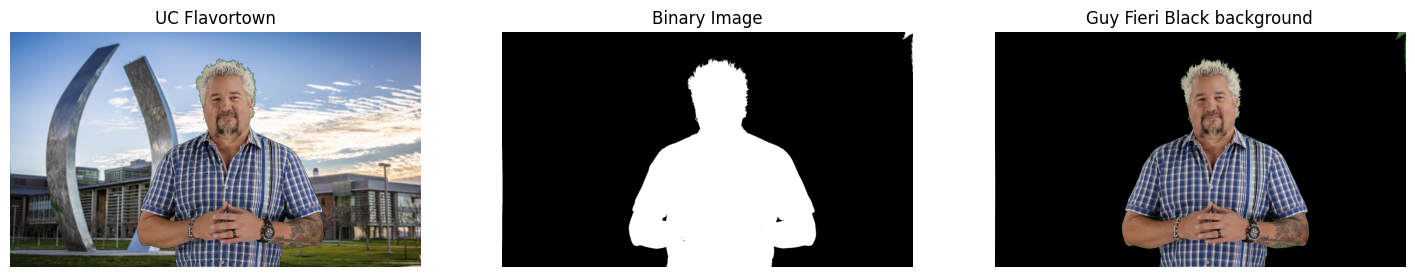

In [18]:
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

guy_fieri = cv2.imread("guy.png")
background = cv2.imread("uc_flavortown.jpg")

# first, im going to match the resolution of the background to Guy
# as well as converting the coloring from bgr to rgb
height1, width1, channels1 = guy_fieri.shape

background_matched = cv2.resize(background,(width1, height1))
background_rgb = cv2.cvtColor(background_matched, cv2.COLOR_BGR2RGB)
guy_fieri_rgb = cv2.cvtColor(guy_fieri, cv2.COLOR_BGR2RGB)

# This function is to remove the background from guy.png
def seperate_background(image):
  input_image = np.array(image)
  height, width, channels = input_image.shape

  background_removed = np.zeros((height, width, 4), dtype=np.uint8)

  for i in range(height):
    for j in range(width):
      r,g,b = input_image[i,j]
      if (r < 120 and g > 100 and b < 120):
        background_removed[i,j] = [0,0,0,0]
      else:
        background_removed[i,j] = [r,g,b,255]

  return background_removed

def mask(image):
  input_image = np.array(image)
  height, width, channels = input_image.shape

  mask = np.zeros((height, width, 3), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      r,g,b = input_image[i,j]
      if (r < 116 and g > 116 and b < 116):
        mask[i,j] = [0,0,0]
      else:
        mask[i,j] = [255,255,255]

  return mask

def black_background(image):
  input_image = np.array(image)
  height, width, channels = input_image.shape

  mask = np.zeros((height, width, 3), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      r,g,b = input_image[i,j]
      if (r < 116 and g > 116 and b < 116):
        mask[i,j] = [0,0,0]
      else:
        mask[i,j] = [r,g,b]

  return mask

test_image = cv2.imread("optimus_thick.png")
# these 2 plt.imShow lines overlay the 2 images
plt.figure(1, figsize=(18,6))
plt.subplot(131)
plt.title("UC Flavortown")
plt.imshow(background_rgb)
plt.imshow(seperate_background(guy_fieri_rgb))
plt.axis('off')

plt.subplot(132)
plt.title("Binary Image")
plt.imshow(mask(guy_fieri_rgb))
plt.axis('off')

plt.subplot(133)
plt.title("Guy Fieri Black background")
plt.imshow(black_background(guy_fieri_rgb))
plt.axis('off')

plt.show()



